# project regarding loan approval

In [ ]:
import pandas as pd          #importing the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split                 #importing the necessary libraries for the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    

In [ ]:
df = pd.read_csv('dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## data understanding :-

In [9]:
df.info()       #this will inform us about our datasaet and all about the datatype in our dataset
df.describe()     #gets summary statistics of the dataset
df.isnull().sum()    #calculates the number of missing values in each column of the dataset and gives us the total number of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## data analysis (mainly through graphs)

### loan status distribution -

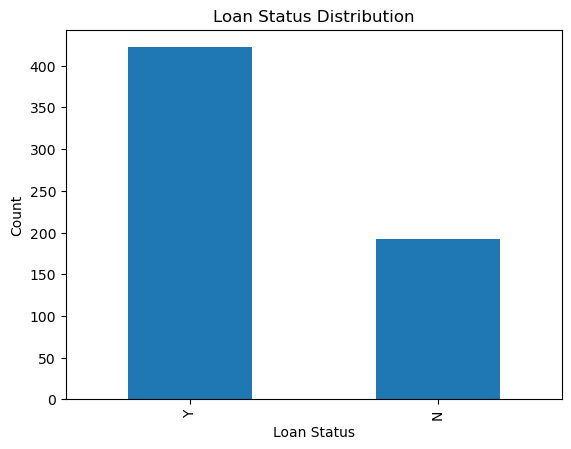

In [16]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


### Applicant Income Distribution -

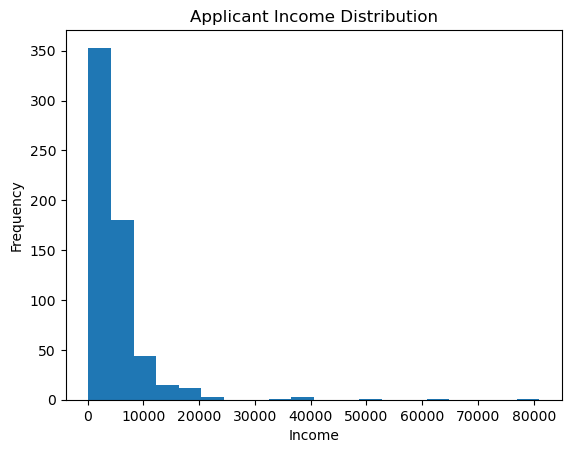

In [ ]:
plt.hist(df['ApplicantIncome'], bins=20)
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()



In [18]:
df.drop('Loan_ID', axis=1, inplace=True)    #dropping the Loan_ID column as it is not useful for our analysis



In [19]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)                  #handling missing values by filling them with mean or mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.fillna(method='ffill', inplace=True)
df.isnull().sum()    #checking again for missing values after handling them

C:\Users\Japes\AppData\Local\Temp\ipykernel_9036\3367431519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)                  #handling missing values by filling them with mean or mode
C:\Users\Japes\AppData\Local\Temp\ipykernel_9036\3367431519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### now we can see there is no null / missing value 

In [39]:

from sklearn.calibration import LabelEncoder


le = LabelEncoder()


for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])



le = LabelEncoder()
y = le.fit_transform(y)


In [40]:
X = df.drop("Loan_Status", axis=1)                                                   #separating features and target variable
y = df["Loan_Status"]                                                        #splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42      
)                                                                        


Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



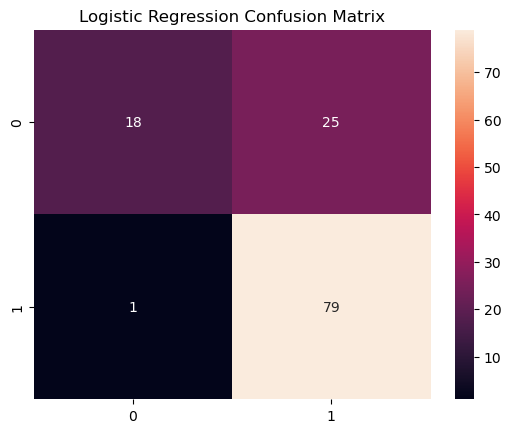

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000)                                 #creating and training the logistic regression model
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)                                 #making predictions and evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# model 2 decision tree -

Decision Tree Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        43
           1       0.75      0.78      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.65       123
weighted avg       0.68      0.68      0.68       123



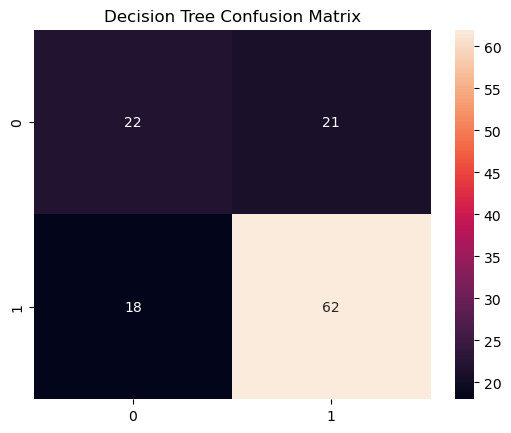

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


# model 3 random forest -

Random Forest Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



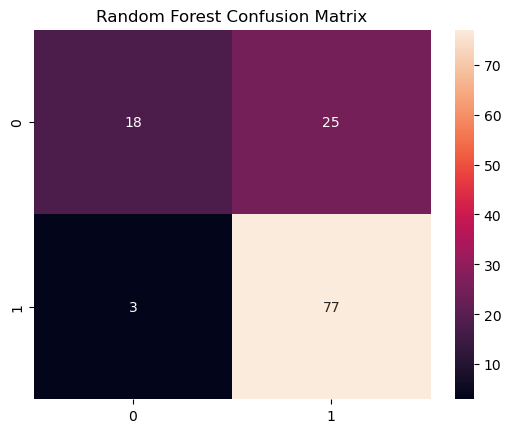

In [45]:

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


# Model Comparison !

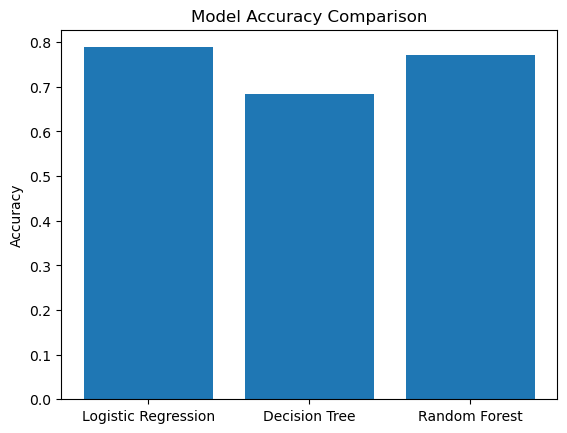

In [46]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
